In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import sin, cos, sqrt, atan2, radians, degrees

In [2]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
print('train shape :', train.shape)
print('test shape :',test.shape)

train shape : (1458644, 11)
test shape : (625134, 9)


- ID - 각 여행에 대한 고유 식별자
- vendor_id - 여행 기록과 관련된 공급자를 나타내는 코드
- pickup_datetime - 미터가 종사한 날짜 및 시간
- dropoff_datetime - 미터가 분리된 날짜 및 시간
- passenger_count - 차량의 승객 수 (운전자가 값을 입력)
- pickup_longitude - 미터가 종사하는 경도
- pickup_latitude - 미터가 종사하는 위도
- dropoff_longitude - 미터가 분리 된 경도
- dropoff_latitude - 미터가 분리 된 위도
- store_and_fwd_flag - 이 플래그는 차량이 서버에 연결되지 않았기 때문에 공급 업체에 보내기 전에 여행 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다.-Y = 저장 및 전달; N = 저장 및 전진 여행 아님
- trip_duration - 초 여행의 기간

In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print('########### train ##################')
print(train.info())

print('########### test ##################')
print(test.info())

########### train ##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
########### test ##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data

In [6]:
print('############# train 결측치 ##############')
print(train.isnull().sum())

print('############# test 결측치 ##############')
print(test.isnull().sum())

############# train 결측치 ##############
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
############# test 결측치 ##############
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64


- 결측치는 모든 데이터에 없다.

In [7]:
print('####################### train ##################')
display(train.describe())

print('###################### test ###################')
display(test.describe())

####################### train ##################


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


###################### test ###################


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

# trip_duration을 target으로 바꿔준다.
train=train.rename(columns = {'trip_duration':'target'})

In [9]:
def sub_function(x):
    a=set(train[x].unique())
    b =set(test[x].unique())
    a =a.difference(test[x])
    b =b.difference(train[x])
    print(f'train_set 에만 있는 값 {a}')
    print(f'test_set 에만 있는 값 {b}')    

<AxesSubplot:xlabel='target', ylabel='Density'>

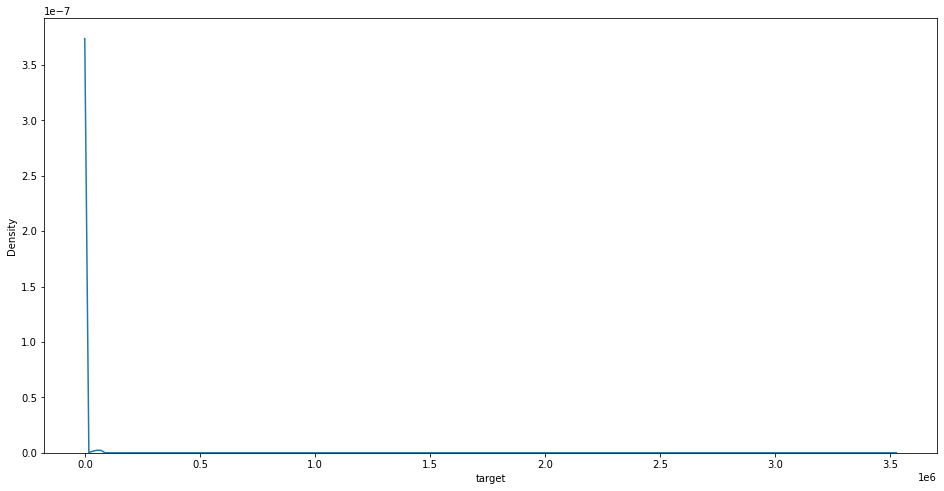

In [10]:
# target에 정규화를 시켜주고 분석을 진행해 주자.
plt.figure(figsize = (16,8))
sns.kdeplot(train['target'])

# id

In [11]:
train['id']=train['id'].apply(lambda x:x[2:])
train['id']=train['id'].astype('int')

test['id'] = test['id'].apply(lambda x: x[2:])
test['id'] = test['id'].astype('int')

In [12]:
train['id'].describe()

count    1.458644e+06
mean     1.999021e+06
std      1.154740e+06
min      1.000000e+00
25%      9.992588e+05
50%      1.998046e+06
75%      2.999228e+06
max      4.000000e+06
Name: id, dtype: float64

In [63]:
print(train['id'].min(), train['id'].max())
print(test['id'].min(), test['id'].max())

1 4000000
2 3999997


<AxesSubplot:xlabel='id', ylabel='Density'>

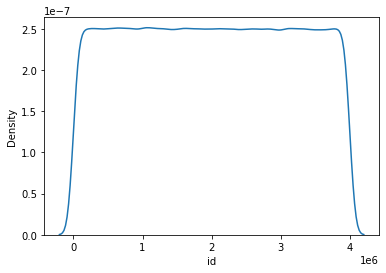

In [67]:
# 특정한 분포를 찾을 수 없으므로 이 데이터는 제거 해 주도록 하자.
sns.kdeplot(data = train, x = 'id')

## vendor_id

In [14]:
train.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

<AxesSubplot:xlabel='vendor_id', ylabel='target'>

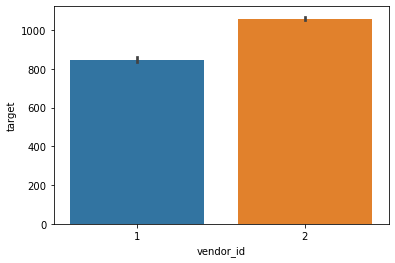

In [15]:
sns.barplot(data = train, x = 'vendor_id', y = 'target')

In [16]:
sub_function('vendor_id')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


- 이 데이터의 경우 설명도 나와 있지 않기 때문에 나중에 다른 변수와 비교할 때 사용해야 겠다.

## passenger_count

In [17]:
print('train의 passenger_count')
print(train['passenger_count'].value_counts())
print('test의 passenger_count')
print(test['passenger_count'].value_counts())

train의 passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64
test의 passenger_count
1    443447
2     90027
5     33411
3     25686
6     20521
4     12017
0        23
9         2
Name: passenger_count, dtype: int64


<AxesSubplot:xlabel='passenger_count', ylabel='target'>

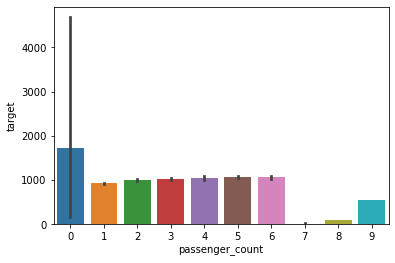

In [18]:
sns.barplot(data = train, x = 'passenger_count', y = 'target')

- 0명을 태웠다는 말은 무슨말일까?
- 일단 test셋에 7과 8이 없음으로 7과 8의 데이터를 지워주도록 하자!!

## pickup_datetime

In [19]:
def datetime(df, column):
    df['month'] = df[column].dt.month
    df['day'] = df[column].dt.day
    df['hour'] = df[column].dt.hour
    return df

In [20]:
train=datetime(df = train, column = 'pickup_datetime')
test=datetime(df = test, column = 'pickup_datetime')

In [21]:
# 주말과 평일을 나누어서 데이터를 분석해 보자.
train['weekday'] = train['pickup_datetime'].apply(lambda x:x.weekday())
train['weekday']=train['weekday'].apply(lambda x: 1 if x > 4 else 0)

test['weekday'] = test['pickup_datetime'].apply(lambda x:x.weekday())
test['weekday']=test['weekday'].apply(lambda x: 1 if x > 4 else 0)

### 평일과 공휴일의 차이

Text(0.5, 1.0, 'weekday vs target')

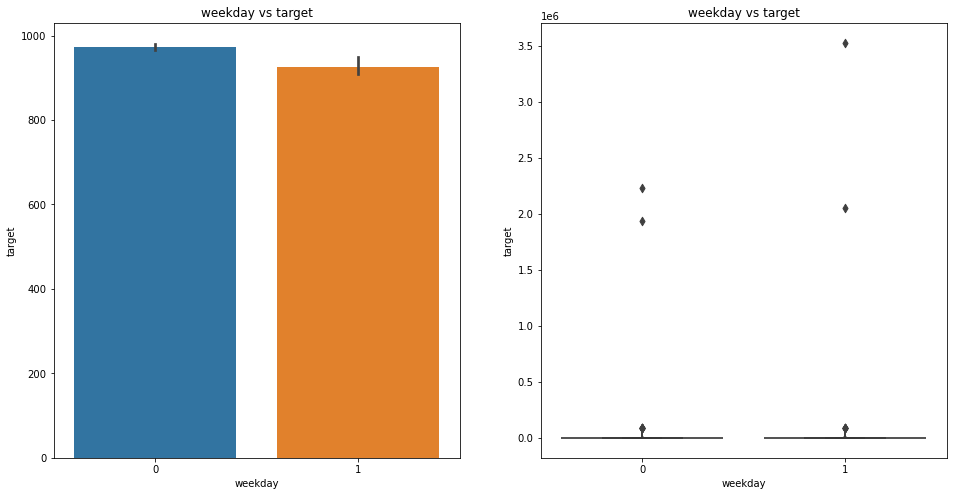

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'weekday', y = 'target', ax = ax[0])
ax[0].set_title('weekday vs target')

sns.boxenplot(data = train, x = 'weekday', y = 'target', ax = ax[1])
ax[1].set_title('weekday vs target')

- 사람들은 평일에 택시를 더 많이 타는 것을 알 수있다.

### 월별로 차이

Text(0.5, 1.0, 'month vs target')

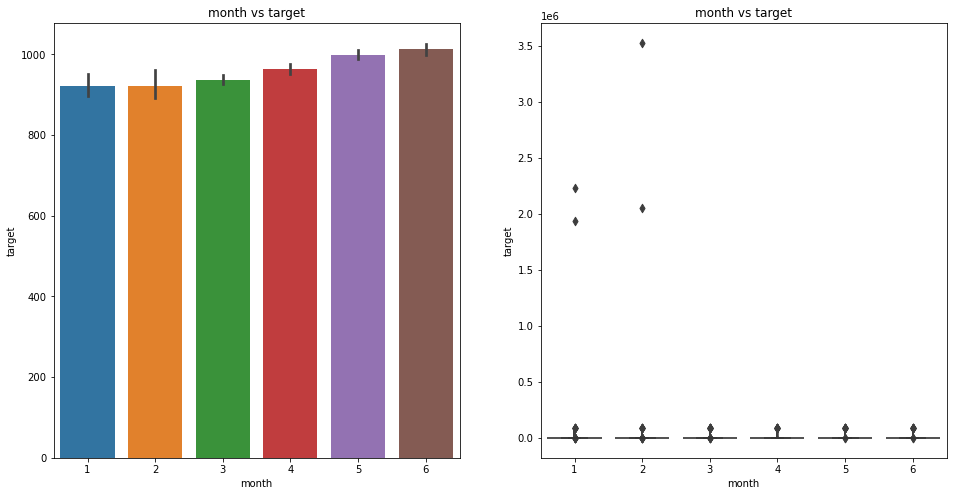

In [23]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'month', y = 'target', ax = ax[0])
ax[0].set_title('month vs target')

sns.boxenplot(data = train, x = 'month', y = 'target', ax = ax[1])
ax[1].set_title('month vs target')

- 매 달마다 택시를 타는 사람이 늘어나고 있다.

In [24]:
sub_function('month')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


### 일별로 차이

<AxesSubplot:xlabel='day', ylabel='target'>

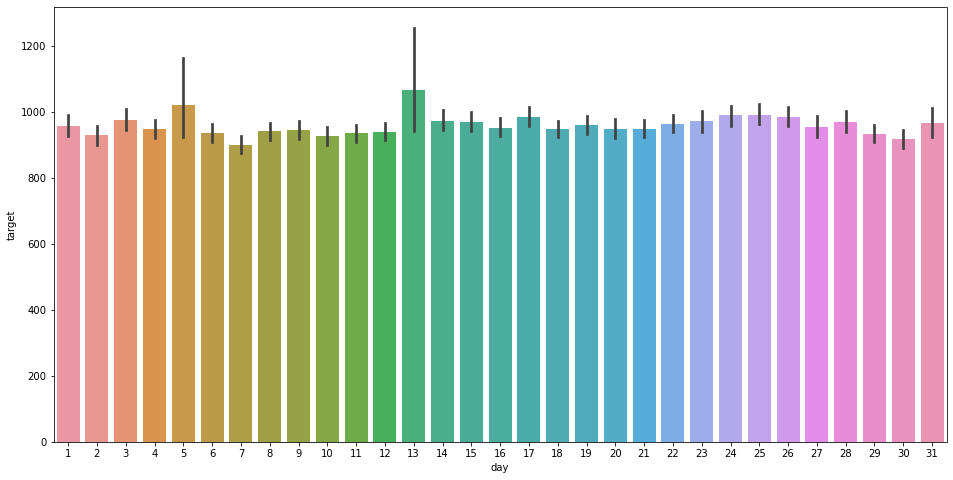

In [25]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'day', y = 'target')

- 일별로는 다른 차이점을 발견하지 못했다.

In [26]:
sub_function('day')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


<AxesSubplot:xlabel='hour', ylabel='target'>

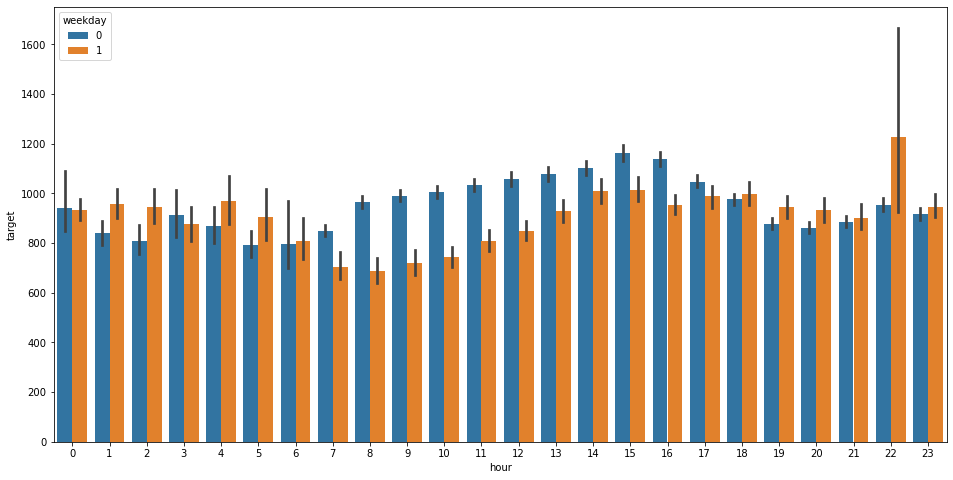

In [27]:
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'hour', y = 'target', hue = 'weekday')

- 시간별로 공휴일인지 아닌지는 차이가 있는 것 같다.

## 위도 경도를 이용해 거리 구하기

In [28]:
from haversine import haversine

In [29]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'target',
       'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [30]:
def haversine1(lat1, lon1, lat2, lon2, R = 6373.0):
    
    R = R # 'km'를 나타내기위해 수를 지정해준다.
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1)*cos(lat2)*sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    distance = R * c
    return distance
    
train['distance'] = train.apply(lambda x:haversine1(x['pickup_latitude'],
                                                   x['pickup_longitude'],
                                                   x['dropoff_latitude'],
                                                   x['dropoff_longitude']
                                                   ), axis = 1)

test['distance'] = test.apply(lambda x:haversine1(x['pickup_latitude'],
                                                   x['pickup_longitude'],
                                                   x['dropoff_latitude'],
                                                   x['dropoff_longitude']
                                                   ), axis = 1)

In [31]:
# haversine을 짯지만 너무 느린관계로 쓰지 않는다.
# from tqdm import tqdm

# def haversine1(df = None):
#     for i in tqdm(df.index):
#         df.loc[i,'distance'] = haversine((df.loc[i,'pickup_longitude'],df.loc[i,'pickup_latitude']),
#                                          (df.loc[i,'dropoff_longitude'],df.loc[i,'dropoff_latitude']), unit = 'm')
#     return df

# distance_train=haversine1(df = train)
# distance_train=pd.DataFrame(distance_train)

# distance_test = haversine1(df = test)
# distance_test = pd.DataFrame(distance_test)

In [32]:
# 상관관계는 0.1도 안되는걸 확인했다.
train[['distance','target']].corr()

,distance,target
distance,1.000000,0.094777
target,0.094777,1.000000


<AxesSubplot:xlabel='distance', ylabel='Density'>

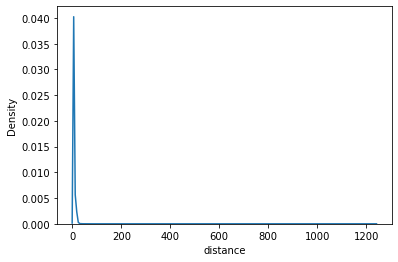

In [33]:
# 그래프를 그려봤을 때 0에 몰려있는 것을 확인했다.
# 로그를 이용해서 정규화를 시켜주자.
sns.kdeplot(data = train, x = 'distance')

In [34]:
# 로그화 작업
train['distance'] = train['distance'].apply(lambda x: np.log1p(x))
test['distance'] = test['distance'].apply(lambda x:np.log1p(x))

## store_and_fwd_flag

In [35]:
train['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='target'>

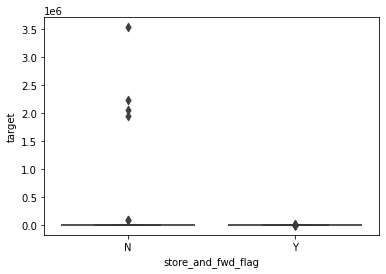

In [36]:
sns.boxenplot(data = train, x = 'store_and_fwd_flag', y = 'target')

- Y가 N보다 더 높은 시간은 나타낸다.

In [37]:
sub_function('store_and_fwd_flag')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='target'>

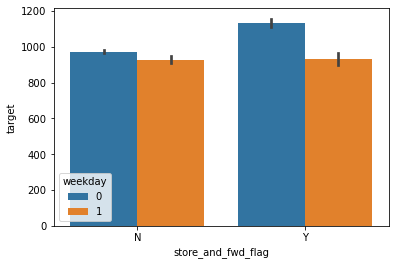

In [38]:
sns.barplot(data = train, x = 'store_and_fwd_flag', y = 'target', hue = 'weekday')

<AxesSubplot:>

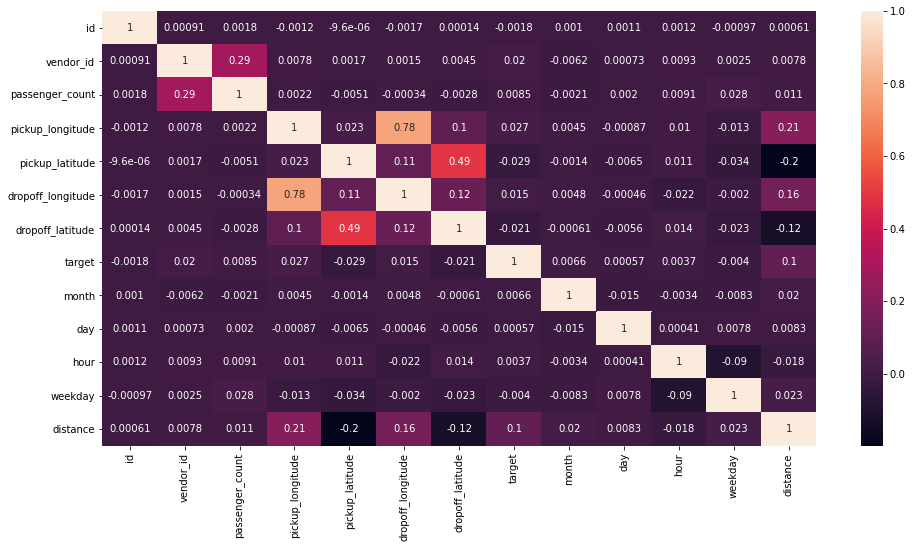

In [39]:
plt.figure(figsize = (16,8))
train_corr=train.corr()
sns.heatmap(train_corr, annot = True)

In [40]:
# import folium

In [41]:
# start=train[['pickup_latitude','pickup_longtitude']]
# g_map = folium.Map(location = [73.982155,40.767937], zoom_start = 18)
# for start in zip(train['pickup_longitude'], train['pickup_latitude']):
#     start = list(start)
#     marker=folium.Marker(start, popup = 'campus seven', icon = folium.Icon(color = 'blue'))
#     marker.add_to(g_map)

In [42]:
print('-------- train ----------')
print(train['distance'].describe())
print('------------ test -----------')
print(test['distance'].describe())

-------- train ----------
count    1.458644e+06
mean     1.254794e+00
std      6.272036e-01
min      0.000000e+00
25%      8.029981e-01
50%      1.129586e+00
75%      1.584439e+00
max      7.124718e+00
Name: distance, dtype: float64
------------ test -----------
count    625134.000000
mean          1.254233
std           0.626017
min           0.000000
25%           0.803040
50%           1.129592
75%           1.585919
max           6.944443
Name: distance, dtype: float64


In [43]:
# 그래서 거리의 사분위수를 이용해 나눠주기로 하자.
train['distance'].describe()

train.loc[train['distance'] <= 0.8029981 , 'distance_binning'] = 0
train.loc[(train['distance'] >=0.8029981) & (train['distance'] < 1.129586), 'distance_binning'] = 1
train.loc[(train['distance'] >= 1.129586) & (train['distance'] < 1.584439 ), 'distance_binning'] = 2
train.loc[train['distance'] >= 1.584439, 'distance_binning'] = 3

test.loc[test['distance'] <= 0.803040 , 'distance_binning'] = 0
test.loc[(test['distance'] >= 0.803040) & (test['distance'] < 1.129592), 'distance_binning'] = 1
test.loc[(test['distance'] >= 1.129592) & (test['distance'] < 1.585919 ), 'distance_binning'] = 2
test.loc[test['distance'] >= 1.585919, 'distance_binning'] = 3

<AxesSubplot:xlabel='distance_binning', ylabel='target'>

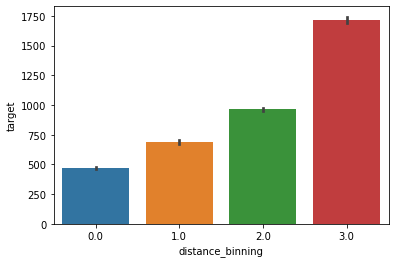

In [44]:
sns.barplot(data = train, x = 'distance_binning', y = 'target')

- 변수마다 연관이 있는 걸로 보여진다.

In [45]:
delete_index=train[(train['passenger_count'] == 7)|(train['passenger_count'] == 8)].index
train=train.drop(delete_index,axis = 0)

sub_function('passenger_count')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


<AxesSubplot:xlabel='hour', ylabel='distance'>

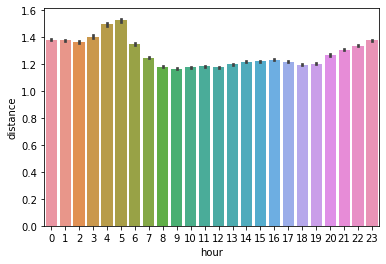

In [46]:
# 3~5시 사이에 높은 이동량을 보인다.
sns.barplot(data = train, x = 'hour', y = 'distance')

<AxesSubplot:xlabel='month', ylabel='distance'>

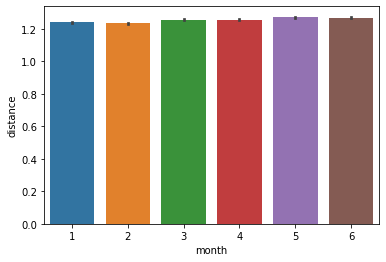

In [47]:
# 눈이 오거나 안오거나에 따라서 거리에 차이가 있을 것 같다.
sns.barplot(data = train, x = 'month', y = 'distance')

# 즉, 눈이 올 시기인 1~2월에는 차들이 좀 더 서행운전을 하기 때문에 목적지에 더 늦게 도착할 것 같다.

### 가정 1 : 날씨가 추운 1~2월은 적은 거리도 추운 날씨 때문에 택시를 탈 것이다.

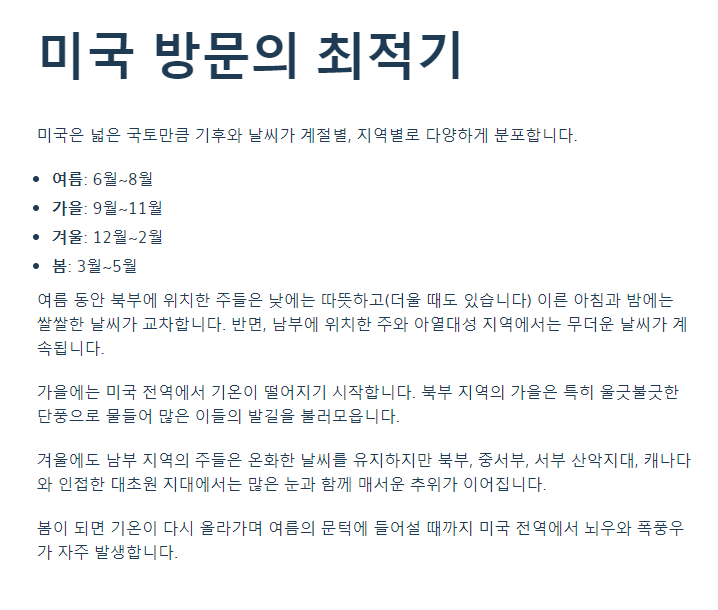

- 변수 0 :1~2월은 겨울인 달
- 변수 1 :3~6월은 겨울이 아닌 달

In [48]:
# 겨울인 1~2월에는 사람들이 적은 거리도 택시를 탈 것이다.
train['cold'] = 1
train.loc[(train['month'] == 1) | (train['month'] == 2), 'cold'] = 0

test['cold'] = 1
test.loc[(test['month'] == 1) | (test['month'] == 2), 'cold'] = 0

In [49]:
train.cold.value_counts()

1    990634
0    468006
Name: cold, dtype: int64

<AxesSubplot:xlabel='cold', ylabel='target'>

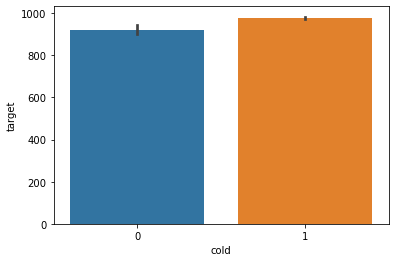

In [50]:
sns.barplot(data = train, x = 'cold', y = 'target')

### 가정 2 :  평일의 일하는 시간대, 일하지 않는 시간대, 주말 이렇게 비교해보도록 하자.
### 2. 일하는 시간대에 사람들이 가장 많이 활동하는 시간대 임으로 도로상황을 고려하여 차를 오래 탄다고 생각한다.
### 1. 주말에 놀러 나가는 사람들이 많으나 일하는 시간대에 비해 차가 안막힌다고 가정한다.
### 0. 평일 일하지 않는 시간대에는 차가 막히지 않으므로 택시를 타고 있는 시간이 적다고 가정했다.

<AxesSubplot:xlabel='hour', ylabel='target'>

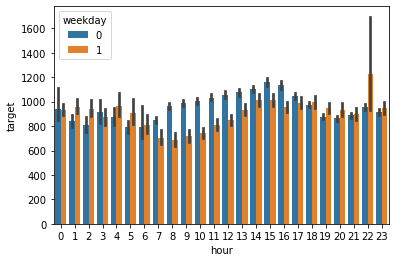

In [51]:
sns.barplot(data = train, x=  'hour', y = 'target', hue = 'weekday')

In [52]:
train.loc[(train['weekday'] == 0), 'working'] = 0
train.loc[train['weekday'] == 1,'working'] = 1
train.loc[(train['weekday'] == 0) & (8 <= train['hour']) & (train['hour'] <= 18), 'working'] = 2

test.loc[(test['weekday'] == 0), 'working'] = 0
test.loc[test['weekday'] == 1,'working'] = 1
test.loc[(test['weekday'] == 0) & (8 <= test['hour']) & (test['hour'] <= 18), 'working'] = 2

<AxesSubplot:xlabel='working', ylabel='target'>

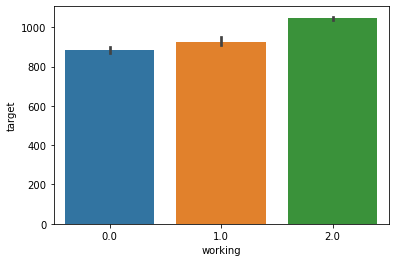

In [53]:
sns.barplot(data = train, x = 'working', y = 'target')

- 유의미한 변수가 될 것 같다.
- 이 변수는 더미화를 시켜주지 않고 넣어주도록 하자.

## 모델링

In [54]:
dummies=['vendor_id','store_and_fwd_flag','month','hour','weekday','distance_binning','passenger_count']
data = pd.get_dummies(data = train[dummies], columns = dummies )
data=pd.concat([data,train['working'], train['cold']], axis =1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRFRegressor, XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [56]:
# 평가 지표
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔줌.  
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌어줌 
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실측값을 빼주고 제곱해줌
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 냄
    mean_difference = difference.mean()
    
    # 다시 루트를 씌움
    score = np.sqrt(mean_difference)  
    
    return score

In [57]:
# min(list(score.values()))

In [58]:
# for key, values in score.items():
#     value=min(score.values())
#     if value == values:
#         best_model = key

## test data

In [59]:
test['distance'].describe()

count    625134.000000
mean          1.254233
std           0.626017
min           0.000000
25%           0.803040
50%           1.129592
75%           1.585919
max           6.944443
Name: distance, dtype: float64

In [60]:
test_dummies=pd.get_dummies(test[dummies], columns = dummies)
test_data = pd.concat([test_dummies, test['working'], test['cold']], axis = 1)

In [71]:
from tqdm import tqdm
models = {'lgb':LinearRegression(),'Ridge':Ridge(),'Lasso':Lasso(),
          'cat':CatBoostRegressor(),'lightgbm':LGBMRegressor()}
X_train, X_test, y_train, y_test = train_test_split(data, train['target'], test_size = 0.2, random_state = 42)
def modeling(models,df = None, target = None, test_data = None):
    circle = {}
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)
    for model in tqdm(models):
        models[model].fit(X_train,y_train)
        y_pred=models[model].predict(X_test)
#         score=rmsle(y_pred,y_test)
        circle[model] = y_pred
    score = circle
    model_value = pd.DataFrame()
    for key, value in score.items():
        model_value[key] = value
        
        
    
    xgb =XGBRegressor()
    xgb=xgb.fit(model_value, y_test)
    
    # train으로 stacking 모델을 만들어 놓고 test를 넣어주자.
    final_score = {}
    for model in tqdm(models):
        y_pred=models[model].predict(test_data)
        final_score[model] = y_pred
    model_value = pd.DataFrame()
    for key, value in final_score.items():
        model_value[key] = value
        
    final_predict=xgb.predict(model_value)
    
    return final_predict

In [72]:
final_predict=modeling(models,df = data, target = train['target'], test_data = test_data)

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:22<00:19,  9.54s/it]

Learning rate set to 0.137194
0:	learn: 5628.1550676	total: 188ms	remaining: 3m 7s
1:	learn: 5623.8095823	total: 336ms	remaining: 2m 47s
2:	learn: 5620.4239563	total: 478ms	remaining: 2m 39s
3:	learn: 5618.0897220	total: 597ms	remaining: 2m 28s
4:	learn: 5616.3052964	total: 804ms	remaining: 2m 40s
5:	learn: 5614.9140553	total: 962ms	remaining: 2m 39s
6:	learn: 5613.9000555	total: 1.1s	remaining: 2m 36s
7:	learn: 5613.1182239	total: 1.23s	remaining: 2m 32s
8:	learn: 5610.9314554	total: 1.38s	remaining: 2m 31s
9:	learn: 5610.4730618	total: 1.52s	remaining: 2m 30s
10:	learn: 5610.1097595	total: 1.66s	remaining: 2m 29s
11:	learn: 5609.7952940	total: 1.79s	remaining: 2m 27s
12:	learn: 5608.2287958	total: 1.94s	remaining: 2m 27s
13:	learn: 5608.0372446	total: 2.07s	remaining: 2m 25s
14:	learn: 5607.7919807	total: 2.2s	remaining: 2m 24s
15:	learn: 5607.6910440	total: 2.33s	remaining: 2m 23s
16:	learn: 5607.5876376	total: 2.49s	remaining: 2m 23s
17:	learn: 5606.4872306	total: 2.62s	remaining: 

150:	learn: 5600.8405386	total: 21.6s	remaining: 2m 1s
151:	learn: 5600.8264552	total: 21.7s	remaining: 2m 1s
152:	learn: 5600.8245369	total: 21.8s	remaining: 2m
153:	learn: 5600.8081985	total: 22s	remaining: 2m
154:	learn: 5600.7939854	total: 22.2s	remaining: 2m
155:	learn: 5600.7710702	total: 22.3s	remaining: 2m
156:	learn: 5600.7309724	total: 22.5s	remaining: 2m
157:	learn: 5600.7223640	total: 22.6s	remaining: 2m
158:	learn: 5600.7205757	total: 22.7s	remaining: 2m
159:	learn: 5600.6962964	total: 22.8s	remaining: 1m 59s
160:	learn: 5600.6946288	total: 22.9s	remaining: 1m 59s
161:	learn: 5600.6824315	total: 23.1s	remaining: 1m 59s
162:	learn: 5600.6808763	total: 23.2s	remaining: 1m 58s
163:	learn: 5600.6794262	total: 23.3s	remaining: 1m 58s
164:	learn: 5600.6670263	total: 23.4s	remaining: 1m 58s
165:	learn: 5600.6469736	total: 23.5s	remaining: 1m 58s
166:	learn: 5600.5903135	total: 23.7s	remaining: 1m 58s
167:	learn: 5600.5629171	total: 23.8s	remaining: 1m 57s
168:	learn: 5600.5563942

299:	learn: 5598.8597647	total: 43.6s	remaining: 1m 41s
300:	learn: 5598.8533056	total: 43.7s	remaining: 1m 41s
301:	learn: 5598.8463274	total: 43.9s	remaining: 1m 41s
302:	learn: 5598.8373684	total: 44.1s	remaining: 1m 41s
303:	learn: 5598.8340840	total: 44.3s	remaining: 1m 41s
304:	learn: 5598.8267187	total: 44.5s	remaining: 1m 41s
305:	learn: 5598.8192521	total: 44.6s	remaining: 1m 41s
306:	learn: 5598.8021642	total: 44.8s	remaining: 1m 41s
307:	learn: 5598.7882415	total: 45s	remaining: 1m 41s
308:	learn: 5598.7774758	total: 45.2s	remaining: 1m 40s
309:	learn: 5598.7741424	total: 45.4s	remaining: 1m 41s
310:	learn: 5598.7681254	total: 45.7s	remaining: 1m 41s
311:	learn: 5598.7634278	total: 45.9s	remaining: 1m 41s
312:	learn: 5598.7383390	total: 46.2s	remaining: 1m 41s
313:	learn: 5598.7256393	total: 46.4s	remaining: 1m 41s
314:	learn: 5598.7200590	total: 46.6s	remaining: 1m 41s
315:	learn: 5598.7105386	total: 46.8s	remaining: 1m 41s
316:	learn: 5598.7078818	total: 47s	remaining: 1m 

446:	learn: 5597.6285292	total: 1m 8s	remaining: 1m 25s
447:	learn: 5597.6169619	total: 1m 8s	remaining: 1m 24s
448:	learn: 5597.6085086	total: 1m 9s	remaining: 1m 24s
449:	learn: 5597.5992952	total: 1m 9s	remaining: 1m 24s
450:	learn: 5597.5948433	total: 1m 9s	remaining: 1m 24s
451:	learn: 5597.5899530	total: 1m 9s	remaining: 1m 24s
452:	learn: 5597.5824875	total: 1m 9s	remaining: 1m 24s
453:	learn: 5597.5771481	total: 1m 9s	remaining: 1m 24s
454:	learn: 5597.5691943	total: 1m 10s	remaining: 1m 23s
455:	learn: 5597.5635310	total: 1m 10s	remaining: 1m 23s
456:	learn: 5597.5573222	total: 1m 10s	remaining: 1m 23s
457:	learn: 5597.5499411	total: 1m 10s	remaining: 1m 23s
458:	learn: 5597.5403180	total: 1m 10s	remaining: 1m 23s
459:	learn: 5597.5335573	total: 1m 10s	remaining: 1m 23s
460:	learn: 5597.5275771	total: 1m 10s	remaining: 1m 22s
461:	learn: 5597.5184484	total: 1m 11s	remaining: 1m 22s
462:	learn: 5597.5133396	total: 1m 11s	remaining: 1m 22s
463:	learn: 5597.5096766	total: 1m 11s	

591:	learn: 5596.4079582	total: 1m 34s	remaining: 1m 4s
592:	learn: 5596.3847559	total: 1m 34s	remaining: 1m 4s
593:	learn: 5596.3804611	total: 1m 34s	remaining: 1m 4s
594:	learn: 5596.3774618	total: 1m 34s	remaining: 1m 4s
595:	learn: 5596.3711863	total: 1m 34s	remaining: 1m 4s
596:	learn: 5596.3655800	total: 1m 35s	remaining: 1m 4s
597:	learn: 5596.3604616	total: 1m 35s	remaining: 1m 4s
598:	learn: 5596.3582188	total: 1m 35s	remaining: 1m 3s
599:	learn: 5596.3513408	total: 1m 35s	remaining: 1m 3s
600:	learn: 5596.3381206	total: 1m 35s	remaining: 1m 3s
601:	learn: 5596.3274716	total: 1m 35s	remaining: 1m 3s
602:	learn: 5596.3223802	total: 1m 36s	remaining: 1m 3s
603:	learn: 5596.3100737	total: 1m 36s	remaining: 1m 3s
604:	learn: 5596.3038558	total: 1m 36s	remaining: 1m 2s
605:	learn: 5596.2968436	total: 1m 36s	remaining: 1m 2s
606:	learn: 5596.2911939	total: 1m 36s	remaining: 1m 2s
607:	learn: 5596.2862302	total: 1m 36s	remaining: 1m 2s
608:	learn: 5596.2783188	total: 1m 37s	remaining

739:	learn: 5595.4334492	total: 2m 1s	remaining: 42.7s
740:	learn: 5595.4291738	total: 2m 1s	remaining: 42.5s
741:	learn: 5595.4239265	total: 2m 1s	remaining: 42.4s
742:	learn: 5595.4200863	total: 2m 2s	remaining: 42.2s
743:	learn: 5595.4062148	total: 2m 2s	remaining: 42s
744:	learn: 5595.4007393	total: 2m 2s	remaining: 41.9s
745:	learn: 5595.3994553	total: 2m 2s	remaining: 41.7s
746:	learn: 5595.3860216	total: 2m 2s	remaining: 41.5s
747:	learn: 5595.3844539	total: 2m 2s	remaining: 41.3s
748:	learn: 5595.3786062	total: 2m 2s	remaining: 41.2s
749:	learn: 5595.3765016	total: 2m 3s	remaining: 41s
750:	learn: 5595.3746599	total: 2m 3s	remaining: 40.8s
751:	learn: 5595.3702462	total: 2m 3s	remaining: 40.7s
752:	learn: 5595.3663260	total: 2m 3s	remaining: 40.5s
753:	learn: 5595.3636130	total: 2m 3s	remaining: 40.3s
754:	learn: 5595.3290058	total: 2m 3s	remaining: 40.2s
755:	learn: 5595.3273360	total: 2m 3s	remaining: 40s
756:	learn: 5595.3248982	total: 2m 4s	remaining: 39.8s
757:	learn: 5595

888:	learn: 5594.5452935	total: 2m 23s	remaining: 18s
889:	learn: 5594.5426502	total: 2m 24s	remaining: 17.8s
890:	learn: 5594.5400011	total: 2m 24s	remaining: 17.6s
891:	learn: 5594.5382421	total: 2m 24s	remaining: 17.5s
892:	learn: 5594.5326470	total: 2m 24s	remaining: 17.3s
893:	learn: 5594.5274992	total: 2m 24s	remaining: 17.1s
894:	learn: 5594.5261250	total: 2m 24s	remaining: 17s
895:	learn: 5594.5191298	total: 2m 24s	remaining: 16.8s
896:	learn: 5594.5167453	total: 2m 24s	remaining: 16.6s
897:	learn: 5594.5130437	total: 2m 25s	remaining: 16.5s
898:	learn: 5594.5106069	total: 2m 25s	remaining: 16.3s
899:	learn: 5594.5057258	total: 2m 25s	remaining: 16.1s
900:	learn: 5594.5035077	total: 2m 25s	remaining: 16s
901:	learn: 5594.5005191	total: 2m 25s	remaining: 15.8s
902:	learn: 5594.4992173	total: 2m 25s	remaining: 15.7s
903:	learn: 5594.4928564	total: 2m 25s	remaining: 15.5s
904:	learn: 5594.4858448	total: 2m 25s	remaining: 15.3s
905:	learn: 5594.4831637	total: 2m 26s	remaining: 15.2

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [03:03<01:09, 69.31s/it]

999:	learn: 5594.1189508	total: 2m 39s	remaining: 0us


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.02it/s]


In [73]:
final_predict

array([ 704.89594,  704.89594,  460.74182, ..., 1181.516  , 1185.381  ,
       6361.561  ], dtype=float32)

In [74]:
submission['trip_duration'] = final_predict

In [75]:
submission.to_csv("submission", index_label=False, index = False)

In [76]:
submission

,id,trip_duration
0,id3004672,704.895935
1,id3505355,704.895935
2,id1217141,460.741821
3,id2150126,1502.878174
4,id1598245,308.810394
...,...,...
625129,id3008929,238.385513
625130,id3700764,1185.380981
625131,id2568735,1181.515991
625132,id1384355,1185.380981


In [83]:
# Pycaret 라이브러리를 불러오기
from pycaret.regression import *

In [89]:
data['target'] = train['target']

In [90]:
pycaret_setup = setup(data = data, target = 'target', fold = 10, fold_shuffle = True, session_id = 10)

,Description,Value
0,session_id,10
1,Target,target
2,Original Data,"(1458640, 51)"
3,Missing Values,False
4,Numeric Features,49
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021047, 47)"


In [ ]:
best_model = compare_models(exclude = ['huber','lar'], cross_validation = True, sort = 'RMSLE', n_select = 6)

IntProgress(value=0, description='Processing: ', max=89)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:59:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,407.8674,29780297.9118,4731.4631,0.0143,0.5463,0.5370,1.8290
lasso,Lasso Regression,465.0440,29716201.1000,4723.3417,0.0189,0.6249,0.8010,7.3890
br,Bayesian Ridge,465.2030,29715671.5062,4723.2726,0.0190,0.6341,0.7977,12.9800
lr,Linear Regression,465.3885,29715742.9000,4723.2858,0.0189,0.6366,0.7948,3.7560
ridge,Ridge Regression,465.3800,29715722.1000,4723.2824,0.0189,0.6367,0.7949,0.5390
omp,Orthogonal Matching Pursuit,478.5385,29727196.2292,4724.8031,0.0181,0.6623,0.9197,0.4910
en,Elastic Net,542.4036,29831984.7000,4738.0913,0.0105,0.7896,1.3116,1.0050
llar,Lasso Least Angle Regression,629.8142,29972950.5239,4756.3021,-0.0000,0.8924,1.6171,0.5000


In [ ]:
# Stacking Ensemble을 하기 위한 함수 생성
def cv_stacking_ensemble(*args, X = None, y = None, test_size = 0.3, n_folds = None, meta_model = None,
                         random_state = None):
    
    # 원본 데이터를 '학습 데이터'와 '검증 데이터'로 나눠준다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, 
                                                        random_state = random_state)
    
    # 교차검증을 수행할 객체 생성하기
    kf = KFold(n_splits = n_folds, shuffle = True, random_state = random_state)
    
    # Meta model이 사용할 '학습 데이터' 반환을 위한 배열 생성 : 모델의 개수 만큼 row가 존재해야 한다.
    meta_X_train = np.zeros((X_train.shape[0], len(args)))
    
    # Meta model이 사용할 '검증 데이터' 반환을 위한 배열 생성 : 모델의 개수 만큼 row가 존재해야 한다.
    meta_X_test = np.zeros((X_test.shape[0], len(args)))
    
    # 사용할 모델을 반복하면서 수행
    for model_count, model in enumerate(args):
        
        # Meta model에서 사용할 '검증 데이터'는 교차검증 내에서 원본 데이터의 '검증 데이터'를 예측한 후 평균을 구해야 한다.
        # 따라서, 각 모델에서 평균을 구하기 전에 예측값을 반환 받기 위한 배열을 생성한다.
        model_test = np.zeros((X_test.shape[0], n_folds))
    
        # 교차검증을 반복하면서 데이터 생성 후, 학습시키기
        for fold_count, (train_index, valid_index) in enumerate(kf.split(X_train)):
            
            # 교차검증 내에서 학습 데이터, 검증 데이터 생성
            cross_x_train = X_train.iloc[train_index]
            cross_y_train = y_train.iloc[train_index]
            cross_x_test = X_train.iloc[valid_index]
            
            # 교차검증 내부에서 생성된 학습 데이터로 모델 학습시키기
            cross_model = model.fit(cross_x_train, cross_y_train)
            
            # 학습시킨 모델로 교차검증 내부에서 생성된 검증 데이터 예측하기
            meta_X_train[valid_index, model_count] = cross_model.predict(cross_x_test)
            
            # 학습시킨 모델로 원본 데이터의 '검증 데이터' 예측하기
            model_test[:, fold_count] = cross_model.predict(X_test)
          
        
        # 교차검증 내에서 원본 데이터의 '검증 데이터'를 예측한 값을 평균 구하기
        meta_X_test[:, model_count] = np.mean(model_test, axis = 1)
        
    # 이제, 입력해준 모델을 반복하면서 Meta model에 사용할 학습 데이터와 검증 데이터를 생성해주었다.
    # Meta model을 사용하여 학습시키기
    meta_model_train = meta_model.fit(meta_X_train, y_train)
    
    # 학습시킨 모델로 값 예측하기
    meta_pred = meta_model_train.predict(meta_X_test)
    
    # RMSE값 반환하기
    rmse = mean_squared_error(y_test, meta_pred, squared = False)
    
    print(rmse)

In [ ]:
final_model=cv_stacking_ensemble(best_model[1], best_model[2], best_model[3], best_model[4],best_model[5]
                     X = X, y = y, n_folds = 10, meta_model = best_model[0], random_state = 100)